In [1]:
import pandas as pd
import seaborn as sns
file = pd.read_csv("data.csv")

In [2]:
file.isnull().sum()


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [3]:
file.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Checking for null values and data shape

In [4]:
print(file.isnull().values.any())
print(file.shape)

False
(6819, 96)


### Ploting bankrupt column

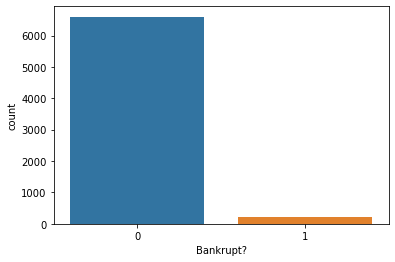

In [5]:
## Data needs to be balanced
sns.countplot(file['Bankrupt?'], label = "Count")

### Data Balancing

#### Under Sampling

In [6]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


In [7]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

After undersampling:  Counter({0: 155, 1: 155})


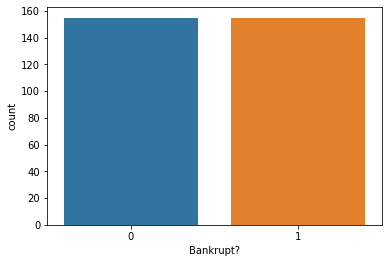

In [10]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("After undersampling: ", Counter(y_train_under))
sns.countplot(y_train_under, label = "Count")

### Feature Selection using filters

#### Chi2 

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = X_train_under
Y = y_train_under
best = SelectKBest(score_func=chi2,k=20)
fit = best.fit(X,Y) 

In [59]:
dfscore = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [60]:
featurescore = pd.concat([dfcol,dfscore], axis = 1)
featurescore.columns = ["feat","Score"]

In [61]:
featurescore

,feat,Score
0,ROA(C) before interest and depreciation befor...,1.796208
1,ROA(A) before interest and % after tax,2.081881
2,ROA(B) before interest and depreciation after...,1.832465
3,Operating Gross Margin,0.010618
4,Realized Sales Gross Margin,0.010581
...,...,...
90,Liability to Equity,0.072720
91,Degree of Financial Leverage (DFL),0.000075
92,Interest Coverage Ratio (Interest expense to ...,0.000167
93,Net Income Flag,0.000000


In [62]:
selectedfeat = featurescore.nlargest(20,"Score")
cols = selectedfeat["feat"]
print(cols)

86                 Total assets to GNP price
10                    Operating Expense Rate
48           Fixed Assets Turnover Frequency
75                    Fixed Assets to Assets
71                 Quick Asset Turnover Rate
50                        Revenue per person
11     Research and development expense rate
62               Inventory/Current Liability
46                   Average Collection Days
28                   Total Asset Growth Rate
58                    Cash/Current Liability
52                Allocation rate per person
35                Total debt/Total net worth
33                               Quick Ratio
66     Long-term Liability to Current Assets
73                        Cash Turnover Rate
47           Inventory Turnover Rate (times)
45              Accounts Receivable Turnover
13       Interest-bearing debt interest rate
70               Current Asset Turnover Rate
Name: feat, dtype: object


## MLP

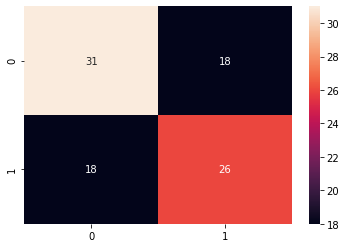

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        49
           1       0.59      0.59      0.59        44

    accuracy                           0.61        93
   macro avg       0.61      0.61      0.61        93
weighted avg       0.61      0.61      0.61        93



In [63]:
MLPclass(X_train_under[cols],y_train_under)

## KNN

In [16]:
from ipynb.fs.full.LearningAlg import *

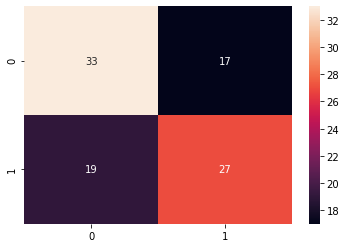

              precision    recall  f1-score   support

           0       0.63      0.66      0.65        50
           1       0.61      0.59      0.60        46

    accuracy                           0.62        96
   macro avg       0.62      0.62      0.62        96
weighted avg       0.62      0.62      0.62        96



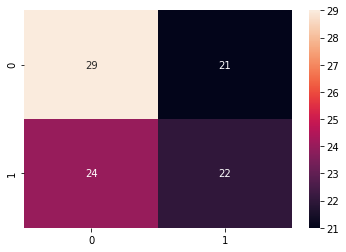

              precision    recall  f1-score   support

           0       0.55      0.58      0.56        50
           1       0.51      0.48      0.49        46

    accuracy                           0.53        96
   macro avg       0.53      0.53      0.53        96
weighted avg       0.53      0.53      0.53        96



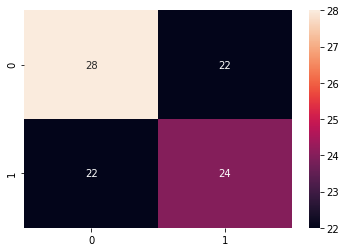

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        50
           1       0.52      0.52      0.52        46

    accuracy                           0.54        96
   macro avg       0.54      0.54      0.54        96
weighted avg       0.54      0.54      0.54        96



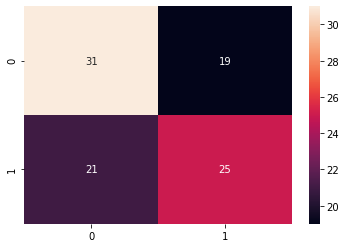

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        50
           1       0.57      0.54      0.56        46

    accuracy                           0.58        96
   macro avg       0.58      0.58      0.58        96
weighted avg       0.58      0.58      0.58        96



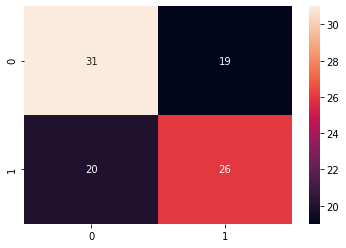

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        50
           1       0.58      0.57      0.57        46

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.59      0.59      0.59        96



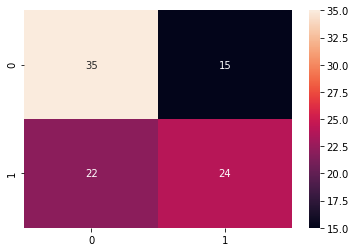

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        50
           1       0.62      0.52      0.56        46

    accuracy                           0.61        96
   macro avg       0.61      0.61      0.61        96
weighted avg       0.61      0.61      0.61        96



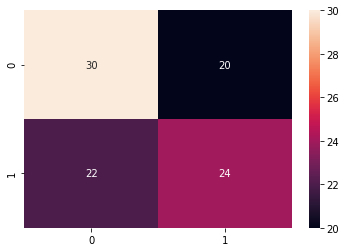

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        50
           1       0.55      0.52      0.53        46

    accuracy                           0.56        96
   macro avg       0.56      0.56      0.56        96
weighted avg       0.56      0.56      0.56        96



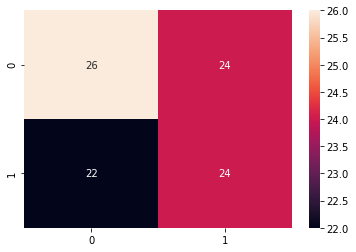

              precision    recall  f1-score   support

           0       0.54      0.52      0.53        50
           1       0.50      0.52      0.51        46

    accuracy                           0.52        96
   macro avg       0.52      0.52      0.52        96
weighted avg       0.52      0.52      0.52        96



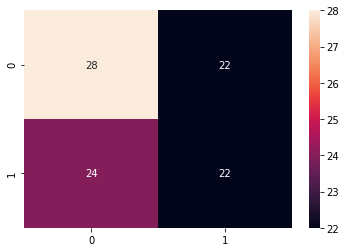

              precision    recall  f1-score   support

           0       0.54      0.56      0.55        50
           1       0.50      0.48      0.49        46

    accuracy                           0.52        96
   macro avg       0.52      0.52      0.52        96
weighted avg       0.52      0.52      0.52        96



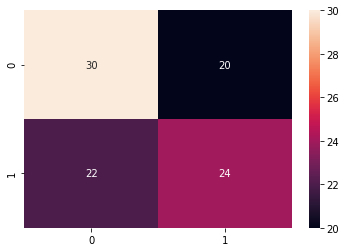

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        50
           1       0.55      0.52      0.53        46

    accuracy                           0.56        96
   macro avg       0.56      0.56      0.56        96
weighted avg       0.56      0.56      0.56        96



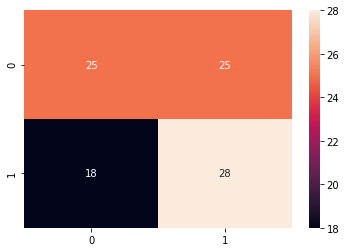

              precision    recall  f1-score   support

           0       0.58      0.50      0.54        50
           1       0.53      0.61      0.57        46

    accuracy                           0.55        96
   macro avg       0.55      0.55      0.55        96
weighted avg       0.56      0.55      0.55        96



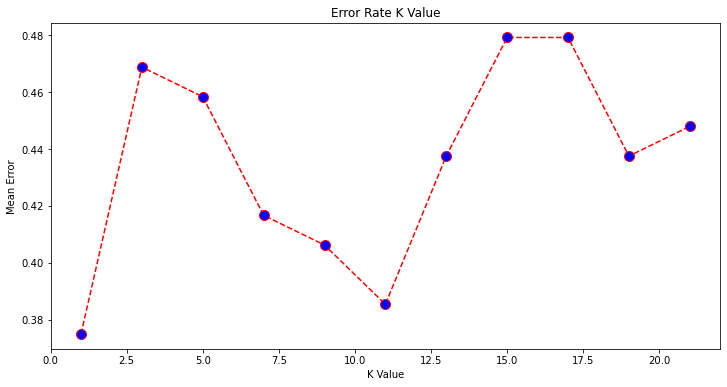

In [17]:
KNNclassifier(X_train_under[cols],y_train_under)


In [18]:
from sklearn import preprocessing

In [19]:
X_train_norm = preprocessing.normalize(X_train_under[cols],norm = 'l2')


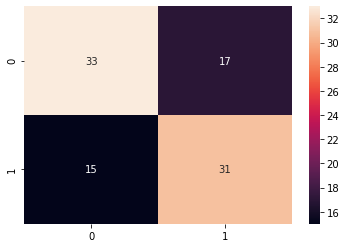

              precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.65      0.67      0.66        46

    accuracy                           0.67        96
   macro avg       0.67      0.67      0.67        96
weighted avg       0.67      0.67      0.67        96



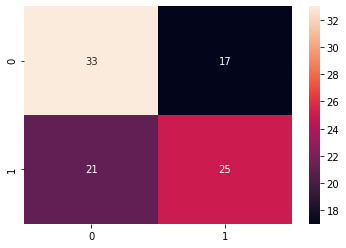

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        50
           1       0.60      0.54      0.57        46

    accuracy                           0.60        96
   macro avg       0.60      0.60      0.60        96
weighted avg       0.60      0.60      0.60        96



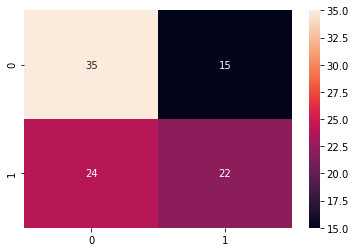

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        50
           1       0.59      0.48      0.53        46

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.59      0.59      0.59        96



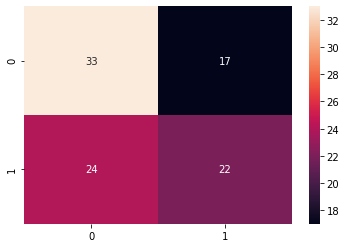

              precision    recall  f1-score   support

           0       0.58      0.66      0.62        50
           1       0.56      0.48      0.52        46

    accuracy                           0.57        96
   macro avg       0.57      0.57      0.57        96
weighted avg       0.57      0.57      0.57        96



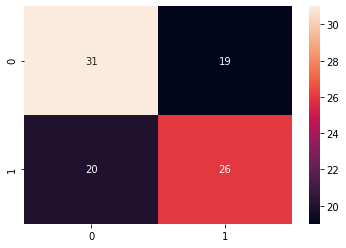

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        50
           1       0.58      0.57      0.57        46

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.59      0.59      0.59        96



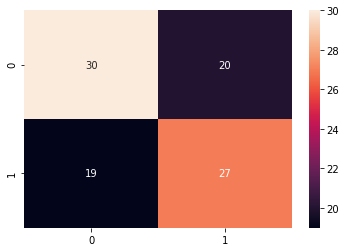

              precision    recall  f1-score   support

           0       0.61      0.60      0.61        50
           1       0.57      0.59      0.58        46

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.59      0.59      0.59        96



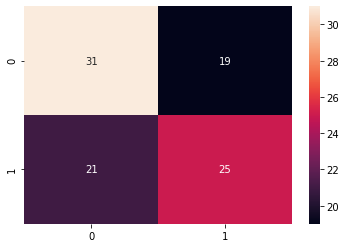

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        50
           1       0.57      0.54      0.56        46

    accuracy                           0.58        96
   macro avg       0.58      0.58      0.58        96
weighted avg       0.58      0.58      0.58        96



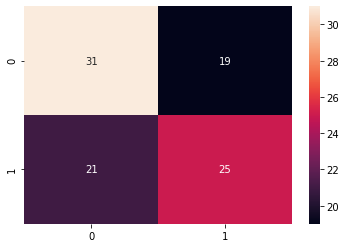

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        50
           1       0.57      0.54      0.56        46

    accuracy                           0.58        96
   macro avg       0.58      0.58      0.58        96
weighted avg       0.58      0.58      0.58        96



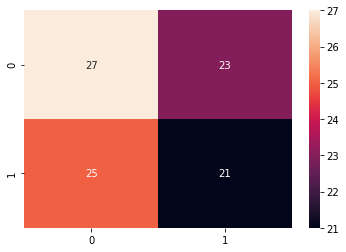

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        50
           1       0.48      0.46      0.47        46

    accuracy                           0.50        96
   macro avg       0.50      0.50      0.50        96
weighted avg       0.50      0.50      0.50        96



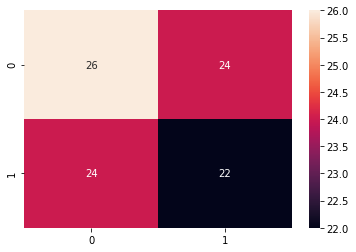

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        50
           1       0.48      0.48      0.48        46

    accuracy                           0.50        96
   macro avg       0.50      0.50      0.50        96
weighted avg       0.50      0.50      0.50        96



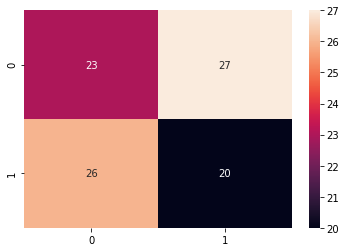

              precision    recall  f1-score   support

           0       0.47      0.46      0.46        50
           1       0.43      0.43      0.43        46

    accuracy                           0.45        96
   macro avg       0.45      0.45      0.45        96
weighted avg       0.45      0.45      0.45        96



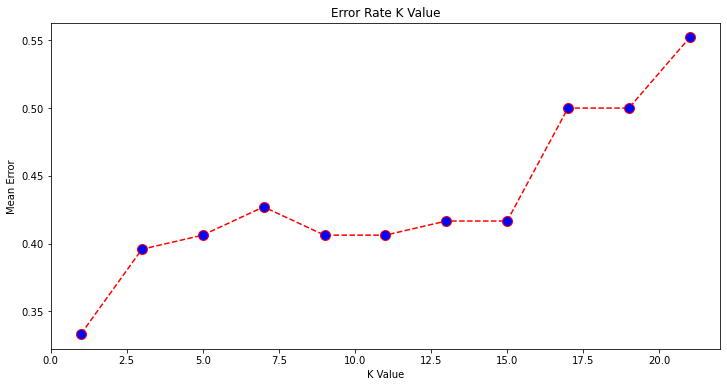

In [20]:
KNNclassifier(X_train_norm,y_train_under)

## SVM

In [21]:
from ipynb.fs.full.LearningAlg import *

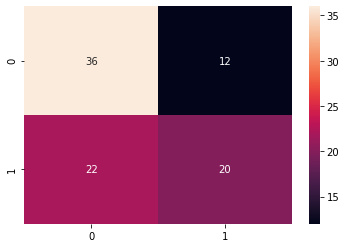

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        48
           1       0.62      0.48      0.54        42

    accuracy                           0.62        90
   macro avg       0.62      0.61      0.61        90
weighted avg       0.62      0.62      0.61        90



KeyboardInterrupt: 

In [24]:
SVMalg(X_train_under[cols],y_train_under)

## Decision Trees Classifier

In [22]:
from ipynb.fs.full.LearningAlg import *

Accuracy: 0.7708333333333334


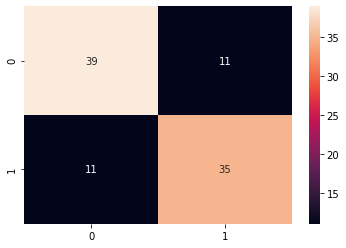

In [23]:
decisionTrees(X_train_under,y_train_under)

Accuracy: 0.65625


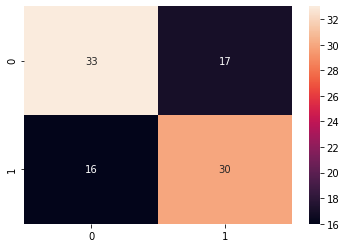

In [24]:
decisionTrees(X_train_norm,y_train_under)

Accuracy: 0.9521016617790812


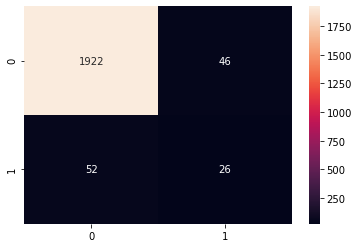

In [25]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]

decisionTrees(X,Y)

#### Using Extra Trees Classifier

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [65]:
print(model.feature_importances_)

[0.02546097 0.0265106  0.02738976 0.01186586 0.01058889 0.0056266
 0.00662473 0.0131929  0.01025125 0.00771688 0.003904   0.0033187
 0.0079605  0.0077621  0.02777506 0.02526974 0.02203633 0.00992091
 0.03260151 0.00923132 0.00645043 0.01195343 0.02290476 0.00399131
 0.00454853 0.0047272  0.00446691 0.00441726 0.00629544 0.01029588
 0.00502086 0.00539144 0.0115711  0.01473682 0.00967565 0.0095523
 0.02687362 0.04246859 0.0034337  0.02437371 0.00261532 0.01468512
 0.01234867 0.00443993 0.00724665 0.00395716 0.00804065 0.00569554
 0.00558597 0.00386859 0.00556975 0.01168743 0.00670257 0.01834105
 0.00462361 0.00430977 0.00802856 0.0101153  0.00561433 0.02654675
 0.00426888 0.00794355 0.0066111  0.00473574 0.00561912 0.01279048
 0.00393867 0.0133532  0.0202942  0.00584654 0.00300802 0.0053481
 0.00580072 0.00678772 0.00395053 0.00363346 0.00481757 0.02023463
 0.00738533 0.0047484  0.00602469 0.00531537 0.00548827 0.00749562
 0.         0.03692196 0.00435396 0.005257   0.01208899 0.0163858


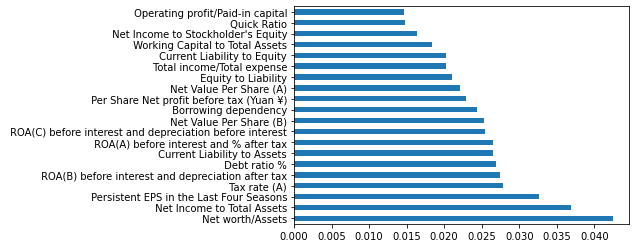

In [66]:
fimport = pd.Series(model.feature_importances_,index = X.columns)
fimport.nlargest(20).plot(kind = 'barh')
plt.show()
cols = fimport.nlargest(20).index

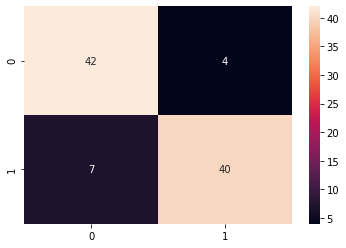

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        49
           1       0.85      0.91      0.88        44

    accuracy                           0.88        93
   macro avg       0.88      0.88      0.88        93
weighted avg       0.88      0.88      0.88        93



In [67]:
MLPclass(X_train_under[cols],y_train_under)

## KNN

In [29]:
from ipynb.fs.full.LearningAlg import *

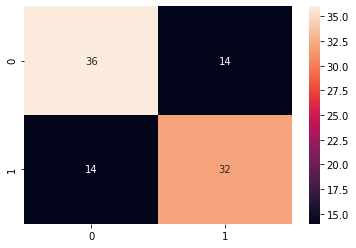

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        50
           1       0.70      0.70      0.70        46

    accuracy                           0.71        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.71      0.71      0.71        96



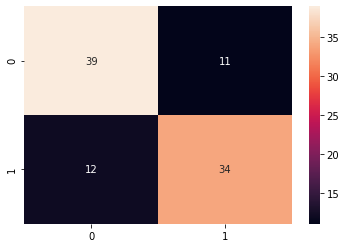

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        50
           1       0.76      0.74      0.75        46

    accuracy                           0.76        96
   macro avg       0.76      0.76      0.76        96
weighted avg       0.76      0.76      0.76        96



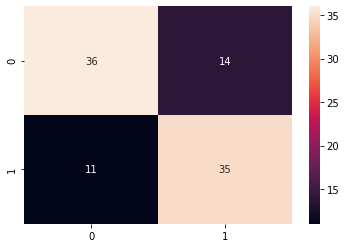

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        50
           1       0.71      0.76      0.74        46

    accuracy                           0.74        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.74      0.74      0.74        96



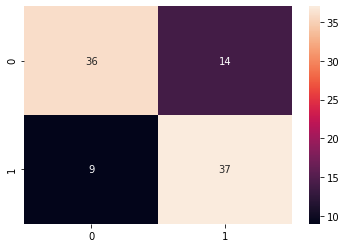

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.73      0.80      0.76        46

    accuracy                           0.76        96
   macro avg       0.76      0.76      0.76        96
weighted avg       0.76      0.76      0.76        96



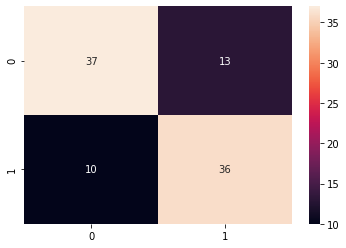

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.73      0.78      0.76        46

    accuracy                           0.76        96
   macro avg       0.76      0.76      0.76        96
weighted avg       0.76      0.76      0.76        96



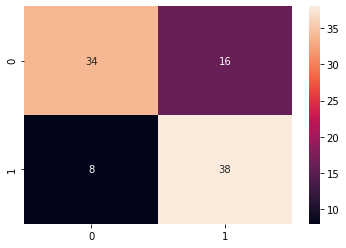

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        50
           1       0.70      0.83      0.76        46

    accuracy                           0.75        96
   macro avg       0.76      0.75      0.75        96
weighted avg       0.76      0.75      0.75        96



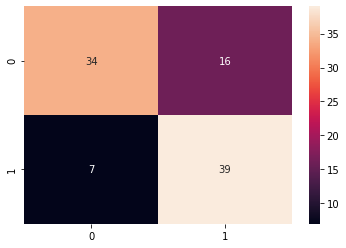

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        50
           1       0.71      0.85      0.77        46

    accuracy                           0.76        96
   macro avg       0.77      0.76      0.76        96
weighted avg       0.77      0.76      0.76        96



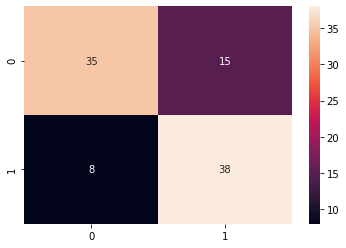

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        50
           1       0.72      0.83      0.77        46

    accuracy                           0.76        96
   macro avg       0.77      0.76      0.76        96
weighted avg       0.77      0.76      0.76        96



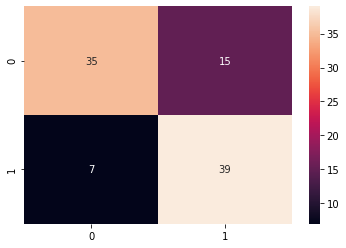

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        50
           1       0.72      0.85      0.78        46

    accuracy                           0.77        96
   macro avg       0.78      0.77      0.77        96
weighted avg       0.78      0.77      0.77        96



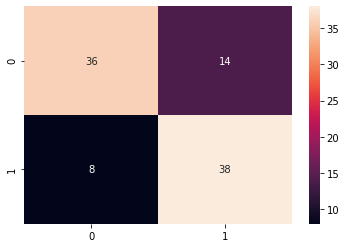

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.73      0.83      0.78        46

    accuracy                           0.77        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.78      0.77      0.77        96



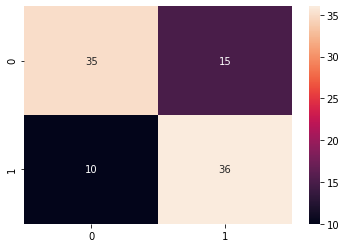

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.71      0.78      0.74        46

    accuracy                           0.74        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.74      0.74      0.74        96



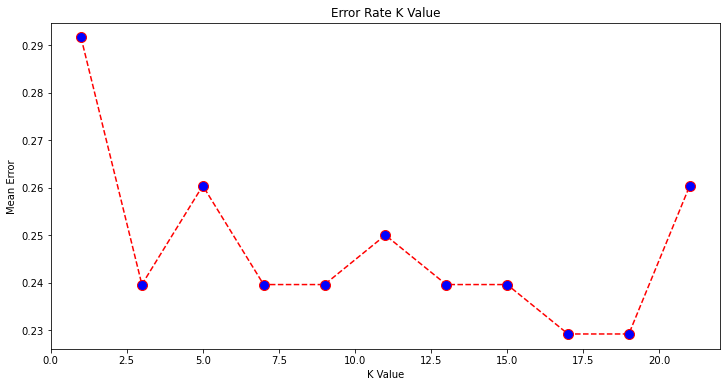

In [30]:

KNNclassifier(X_train_under[cols],y_train_under)

## Decision Trees Classifier

Accuracy: 0.8333333333333334


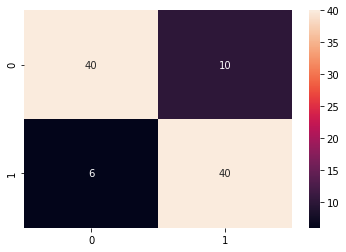

In [31]:
decisionTrees(X_train_under[cols],y_train_under)

Accuracy: 0.9506353861192571


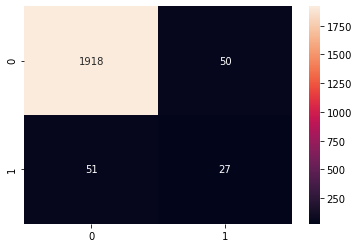

In [32]:
X = file.iloc[:,1:]
Y = file.iloc[:,0]
decisionTrees(X,Y)

## SVM

In [28]:
from ipynb.fs.full.LearningAlg import *

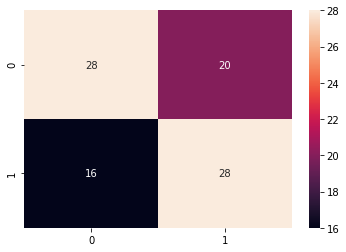

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        48
           1       0.58      0.64      0.61        44

    accuracy                           0.61        92
   macro avg       0.61      0.61      0.61        92
weighted avg       0.61      0.61      0.61        92



In [29]:
SVMalg(X_train_under[cols], y_train_under)

### Using MLP Classifier

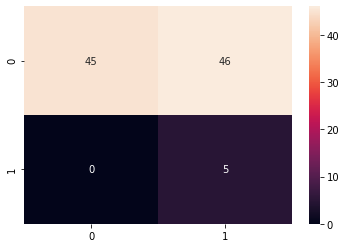

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        45
           1       1.00      0.10      0.18        51

    accuracy                           0.52        96
   macro avg       0.75      0.55      0.42        96
weighted avg       0.76      0.52      0.41        96



In [34]:
MLPclass(X_train_under[cols],y_train_under)

In [42]:
#### 1-1 Feature selection using sklearn's SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=29)

fit = bestfeatures.fit(X_train_under,y_train_under)
dfscore = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(X_train_under.columns)
featureScore = pd.concat([dfcolumn,dfscore],axis=1)
featureScore.columns = ['Features','Score']

featureScore.sort_values('Score',ascending=False,inplace=True)
featureScore.reset_index(drop=True,inplace=True)

featureScore['Features'][0:29]

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0                                      Net worth/Assets
1                                          Debt ratio %
2               Persistent EPS in the Last Four Seasons
3              Per Share Net profit before tax (Yuan ¥)
4                 Net profit before tax/Paid-in capital
5                            Total income/Total expense
6      ROA(C) before interest and depreciation befor...
7      ROA(B) before interest and depreciation after...
8                ROA(A) before interest and % after tax
9                               Net Value Per Share (B)
10                              Net Value Per Share (A)
11                              Net Value Per Share (C)
12                           Net Income to Total Assets
13                    Retained Earnings to Total Assets
14                      Working Capital to Total Assets
15                     Operating profit/Paid-in capital
16                  Operating Profit Per Share (Yuan ¥)
17                          Current Liability to

In [43]:
cols = featureScore['Features'][0:29]
cols = cols.values

In [44]:
from ipynb.fs.full.LearningAlg import *

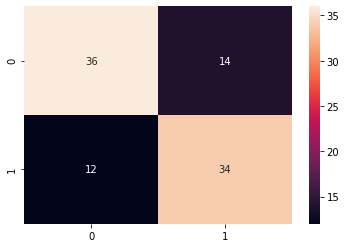

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        50
           1       0.71      0.74      0.72        46

    accuracy                           0.73        96
   macro avg       0.73      0.73      0.73        96
weighted avg       0.73      0.73      0.73        96



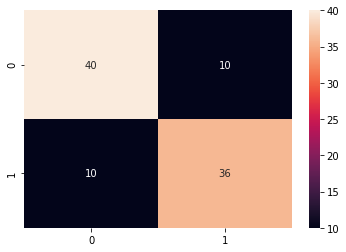

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        50
           1       0.78      0.78      0.78        46

    accuracy                           0.79        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.79      0.79      0.79        96



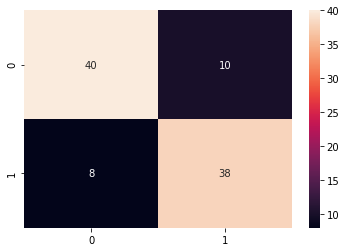

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        50
           1       0.79      0.83      0.81        46

    accuracy                           0.81        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.81      0.81        96



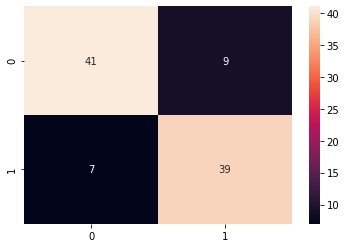

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.81      0.85      0.83        46

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.83      0.83      0.83        96



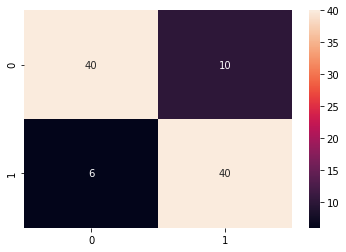

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.80      0.87      0.83        46

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.84      0.83      0.83        96



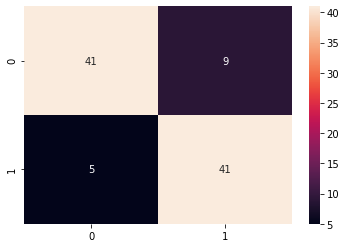

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.82      0.89      0.85        46

    accuracy                           0.85        96
   macro avg       0.86      0.86      0.85        96
weighted avg       0.86      0.85      0.85        96



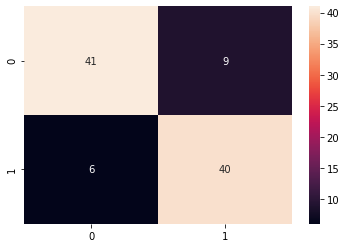

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        50
           1       0.82      0.87      0.84        46

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.85      0.84      0.84        96



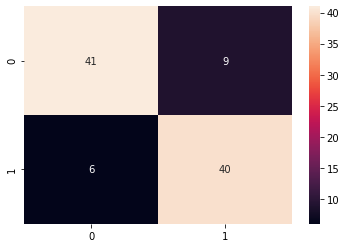

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        50
           1       0.82      0.87      0.84        46

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.85      0.84      0.84        96



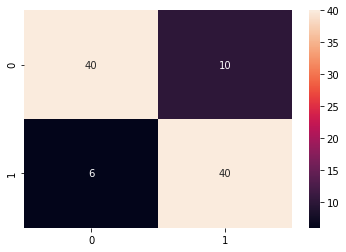

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.80      0.87      0.83        46

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.84      0.83      0.83        96



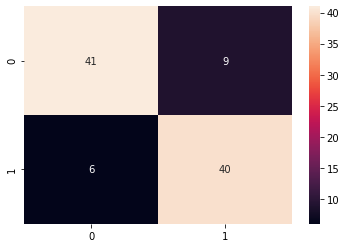

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        50
           1       0.82      0.87      0.84        46

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.85      0.84      0.84        96



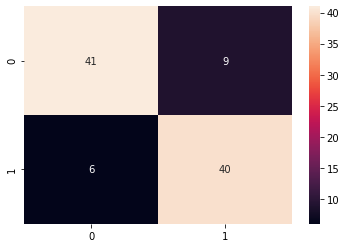

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        50
           1       0.82      0.87      0.84        46

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.85      0.84      0.84        96



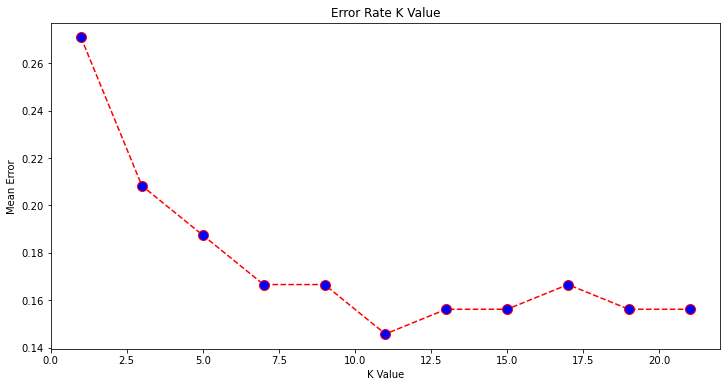

In [45]:
KNNclassifier(X_train_under[cols], y_train_under)

## Decision Trees Classifier

In [25]:
from ipynb.fs.full.LearningAlg import *

Accuracy: 0.78125


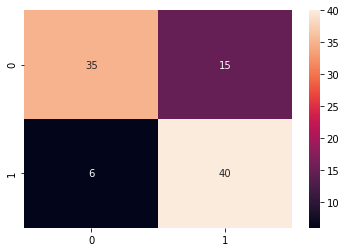

In [46]:
decisionTrees(X_train_under[cols], y_train_under)

## SVM

In [15]:
from ipynb.fs.full.LearningAlg import *

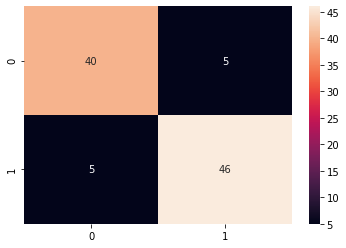

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.90      0.90      0.90        51

    accuracy                           0.90        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96



AttributeError: 'GridSearchCV' object has no attribute 'best_param_'

In [47]:
SVMalg(X_train_under[cols], y_train_under)

### Using MLP Classifier

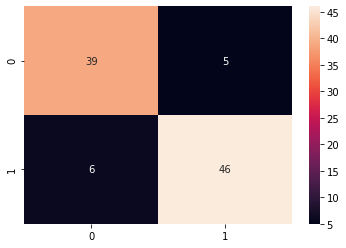

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.88      0.90      0.89        51

    accuracy                           0.89        96
   macro avg       0.89      0.88      0.88        96
weighted avg       0.89      0.89      0.89        96



In [48]:
MLPclass(X_train_under[cols], y_train_under)